# Semana 6: Reresión polinomial, _over/underfitting_, _test/train split_, regularización
# (mas prelúdios al aprendizaje automático e IA) 

# Recapitulando

Generamos nuestros propios datos porque así:
* Tenemos una forma de comparar/evaluar los resultados: sabemos cual es la función real subyaciente que queremos aprender (en otras palabras sabemos la "verdad" y queremos ver que tan bien la recuperamos).
* Podemos generar tantos datos cuanto querramos, cuantas veces querramos
* Podemos _controlar_ los datos, probando diferentes formas funcionales de la función que queremos predecir/reproducir
* Podemos agregar ruído (dispersión) y también controlar como lo hacemos
* Podemos elegir modelos muy simples o tan complejos como querramos

Generemos el mismo tipo de conjunto de datos fictício que en la clase anterior

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_SAMPLES = 15 # cuantos datos vamos a generar (cuantos pares {t,x}, líneas de una base de datos, etc.)
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)

# Fijamos la semilla aleatoria, por si queremos reproducir exactamente los mismos resultados en otro momento
np.random.seed(42)

# ¡Ahora la función que reremos modelizar no es más linear en la variable! Generamos puntos a partir de ella
def ground_truth(x):
    return 4 * x + 2 * np.sin(x*6)

# Agregamos ruido a los datos
t = ground_truth(x) + 0.5*np.random.randn(N_SAMPLES,1)

Observación: cuando queremos aprender a predecir valores a partir de un modelo, se suele llamar a _y_ de variable _target_ (blanco) _t_.

Hagamos el plot

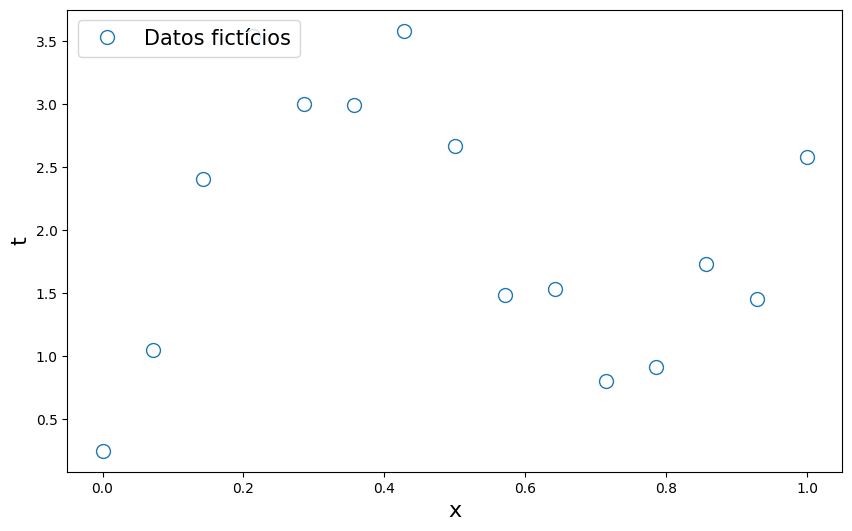

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_ = np.linspace(0,1, 100).reshape(-1,1)
ax.plot(x, t, 'o', ms=10, mfc='None', label='Datos fictícios')
# ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Predicted curve')
#ax.plot(x_, mi_recta(x_), 'k-', lw=3, alpha=0.5, label='Recta verdadera')
ax.legend(loc=2, fontsize=15)
    
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

## Recapitulando la regresión lineal


De forma general los modelos lineales se escriben como

$$\vec y = X \cdot \vec \omega$$
donde $$X = \begin{pmatrix}
1&\; x_1^{(1)}&\; \dots&\;x_M^{(1)} \\
1&\; x_1^{(2)}&\; \dots&\;x_M^{(2)} \\
\vdots&\;\vdots&\;\ddots&\;\vdots \\
1&\; x_1^{(N)}&\; \dots&\;x_M^{(N)}
\end{pmatrix}$$ es la _matriz de diseño_, o, simplemente, el conjunto de datos con el que estamos entrenando. Cada fila representa una muestra, y cada columna una característica.

Para un vector de datos $x$ la función linear es:

$$y = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + \dots + \omega_M x_M$$

Ejemplo: si tenemos 3 _features_/características que queremos usar para modelizar (_predecir_) la variable target y, y tenemos _N_ datos (por ejemplo, una tabla de valores con _N_ líneas) la matriz de diseño es

$$X = \begin{pmatrix}
1&\; x_1^{(1)}&\; x_2^{(1)}&\; x_3^{(1)}\\
1&\; x_1^{(2)}&\; x_2^{(2)}&\;x_3^{(2)} \\
\vdots&\;\vdots&\;\vdots&\;\vdots \\
1&\; x_1^{(N)}&\; x_2^{(N)}&\;x_3^{(N)}
\end{pmatrix}$$

Ejemplo: predecir el precio de un inmueble en función de su superfície, edad y distancia al centro

precio [USD]=𝜔0+𝜔1⋅sup. total.+ 𝜔2⋅edad + 𝜔3⋅distancia

Los modelos son lineales **en los pesos** $\omega_i$


## Recapitulando regresión polinomial

Un polinómio de una únca variable se puede escribir como:

$$y = \omega_0 + \omega_1 x + \omega_2 x^2 + \dots + \omega_M x^M$$

Por ejemplo, una función cúbica:

$$y = \omega_0 + \omega_1 x + \omega_2 x^2 + \omega_3 x^3$$

Vean la semejanza con una función _lienal_ de várias variables.

En la regresión polinomial, generamos nuevas columnas usando potencias de la variable original. De forma que la función sigue siendo lineal en los *parámetros* $\omega_i$.

La matriz de diseño es
$$\vec y = X \cdot \vec \omega$$
donde $$X = \begin{pmatrix}
1&\; x^{(1)}&\; \dots&\;\left(x^{(1)}\right)^M \\
1&\; x^{(2)}&\; \dots&\;\left(x^{(2)}\right)^M \\
\vdots&\;\vdots&\;\ddots&\;\vdots \\
1&\; x^{(N)}&\; \dots&\;\left(x^{(N)}\right)^M
\end{pmatrix}$$ 

Para generar esa matriz podemos usar `PolynomialFeatures` de `sklearn`:

In [4]:
from sklearn.preprocessing import PolynomialFeatures

M = 3

# generamos la matriz de diseño para regresión polinomial de tercer orden (función cúbica)
poly = PolynomialFeatures(M)
x_poly = poly.fit_transform(x)

In [107]:
print(np.round(x_poly, 4))

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 7.140e-02 5.100e-03 4.000e-04]
 [1.000e+00 1.429e-01 2.040e-02 2.900e-03]
 [1.000e+00 2.143e-01 4.590e-02 9.800e-03]
 [1.000e+00 2.857e-01 8.160e-02 2.330e-02]
 [1.000e+00 3.571e-01 1.276e-01 4.560e-02]
 [1.000e+00 4.286e-01 1.837e-01 7.870e-02]
 [1.000e+00 5.000e-01 2.500e-01 1.250e-01]
 [1.000e+00 5.714e-01 3.265e-01 1.866e-01]
 [1.000e+00 6.429e-01 4.133e-01 2.657e-01]
 [1.000e+00 7.143e-01 5.102e-01 3.644e-01]
 [1.000e+00 7.857e-01 6.173e-01 4.851e-01]
 [1.000e+00 8.571e-01 7.347e-01 6.297e-01]
 [1.000e+00 9.286e-01 8.622e-01 8.007e-01]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00]]


Ahora hacemos el ajuste usando la regresión lineal:

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(x_poly, t)

LinearRegression(fit_intercept=False)

In [6]:
# Miramos los coeficientes

print(*lr.coef_)

[-6.05967099e-02  2.62201291e+01 -6.12618289e+01  3.77036690e+01]


¿Qué hace el `.fit`? 

   * El método `.fit` fitea (ajusta) el modelo a los datos. 
   * Para eso, *minimiza* el error en función de los parámetros. 
   * En general se minimiza lo que se llama _figura de mérito_ o _métrica_, que en este caso fue el MSE. 
   * En otras palabras, el resultado del `fit` es determinar los parámetros del modelo que mejor ajustan esos datos. 
   * Podemos decir que con eso **entrenamos** el modelo, o que el modelo ha "aprendido" de los datos.
   * En el caso particular de la regresión linear, esa solución para los parámetros del modelo es muy simple, tiene una expresión matemáica que se puede caclular en un para de líneas de cógido
   * En general, fitear requiere métodos sofisticados de minimización, especialmente se hay muchos parámetros
   * Y/o si *cambiamos la figura de mérito/métrica* del error

## Recordando métricas de los errores: MSE, MAE

Como vimos en la clase anterior, la diferencia entre la predicción del modelo y los valores reales son los resíduos. Definimos las siguintes métricas para ver si el modelo representa bien o no a los datos:

**Error absoluto promedio (o medio)**, MAE, por sus siglas en inglés, que matemáticamente se escribe:

$$
\text{MAE} = \frac{1}{N} \left(|r_1| + |r_2| + \cdots + |r_N|\right) = \frac{1}{N} \sum_{i=1}^N \left| r_i \right |\;\;.
$$

**Rrror cuadrático promedio**, MSE:

$$
\text{MSE} = \frac{1}{N} \left(r_1^2 + r_2^2 + \cdots + r_N^2\right) = \frac{1}{N} \sum_{i=1}^N \left( r_i \right )^2\;\;.
$$

Veamos como quedó la función ajustada. Para eso usaremos el método `.predict`


¿Qué hace el `.predict`?

* Una vez entrenado un dado modelo con un conjunto de datos (con `.fit`) se puede usar ese método para obtener las _predicciones_ del modelo.
* O sea, para cualquier conjunto de x, nos va a dar el _resultado del modelo_ (la función), usando los parámetros obtenidos a partir del entrenamiento.
* Para entrenar se necesitan muchos datos (o sea, "líneas" de una base de datos)
* Las predicciones se hacen para cada dato en particular (cada x)
* En el `.fit` se varian los parámetros del modelo. El conjunto de datos es fijo. 
* En el `.predict`, los parámetros están fijos y se puede calcular para cualquier dato

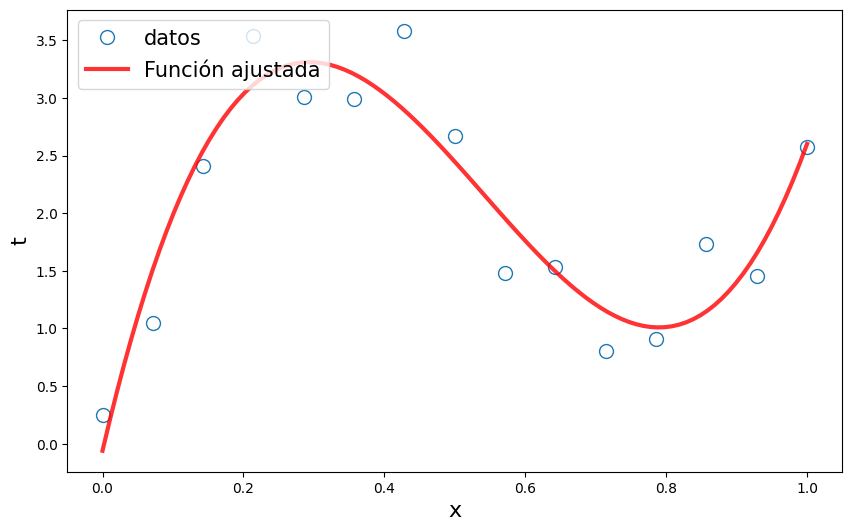

El MSE es: 0.13


In [7]:
from sklearn.metrics import mean_squared_error

predictions = lr.predict(poly.transform(x_))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_ = np.linspace(0,1, 100).reshape(-1,1)
ax.plot(x, t, 'o', ms=10, mfc='None', label='datos')
#ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
ax.plot(x_, predictions, 'r-', lw=3, alpha=0.8, label='Función ajustada')
ax.legend(loc=2, fontsize=15)
    
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

error = mean_squared_error(t, lr.predict(x_poly))

print(f"""El MSE es: {round(error,2)}""")

### Hyper-parámetros y Pipelines

Ahora podemos ver que nuestro modelo tiene un **hiperparámetro**: el grado del polinomio $M$. Podemos variar este hiperparámetro, y por lo tanto variar nuestro modelo, para ver cómo se comporta.

Para ello, vamos a poner todo junto en un Pipeline. Un pipeline es una lista de tuplas `(nombre, modelo)`, en la que cada modelo tiene un método `fit` que se alimenta de la salida del modelo anterior. La entrada del primer modelo son las variables de entrada, y la salida de todos los modelos menos el último se obtiene a través del método `transform`. Esto nos permite armar una cadena de modelos que _transforman_ los datos de entrada, los cuales son alimentados en el último modelo que se llama _estimador_ y tiene un método `predict` que arroja la predicción de toda la tubería.

Recordemos cómo se construye esto:

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regressor(M):
    pr = Pipeline([
        ('poly_features', PolynomialFeatures(M)),
        ('regressor', LinearRegression(fit_intercept=False) )])
    return pr

Ahora podemos hacer el ajuste cuadrático en un solo paso.

In [10]:
pr = polynomial_regressor(3)
pr.fit(x, t)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression(fit_intercept=False))])

Y poemos usar las funciones que definimos al principio para el cálculo del error.


In [11]:
error = mean_squared_error(t, pr.predict(x))

print(f"""El MSE es: {round(error,2)}""")

El MSE es: 0.13


Los nombres de cada tupla se utilizan como clave para acceder a cada uno de los _pasos_ del pipeline en el diccionario `named_steps`:

In [12]:
pr.named_steps

{'poly_features': PolynomialFeatures(degree=3),
 'regressor': LinearRegression(fit_intercept=False)}

Y esto puede usarse, por ejemplo, para obtener los valores de los parámetros ajustados.

In [13]:
pr.named_steps['regressor'].coef_

array([[-6.05967099e-02,  2.62201291e+01, -6.12618289e+01,
         3.77036690e+01]])

## Aumentando el grado del polinomio y sobreajuste

Ahora, podemos iterar sobre ciertos grados del polinomio y ver cómo se comporta

In [16]:
# Crea una lista de grado
degrees = range(1, 15)

# Inicializa listas
errors = []
models = []

# Itera en todos los grados
for M in degrees:
    print(f"Grado del polinomio: {M}")
    
    # Create polynomial model
    pr = polynomial_regressor(M)
    
    # Fit 
    pr.fit(x, t)
    
    # Evaluate errors
    error_n = mean_squared_error(t, pr.predict(x))
    print(f"""El MSE es: {round(error_n,2)}""")    
    # guarda el resultado en listas
    errors.append(error_n)
    models.append(pr)

Grado del polinomio: 1
El MSE es: 1.01
Grado del polinomio: 2
El MSE es: 0.85
Grado del polinomio: 3
El MSE es: 0.13
Grado del polinomio: 4
El MSE es: 0.13
Grado del polinomio: 5
El MSE es: 0.1
Grado del polinomio: 6
El MSE es: 0.1
Grado del polinomio: 7
El MSE es: 0.1
Grado del polinomio: 8
El MSE es: 0.06
Grado del polinomio: 9
El MSE es: 0.06
Grado del polinomio: 10
El MSE es: 0.06
Grado del polinomio: 11
El MSE es: 0.02
Grado del polinomio: 12
El MSE es: 0.01
Grado del polinomio: 13
El MSE es: 0.0
Grado del polinomio: 14
El MSE es: 0.0


¡Vemos que aumentar el grado del polinomio mejor el ajuste!
Veamos graficamente todos estos modelos.

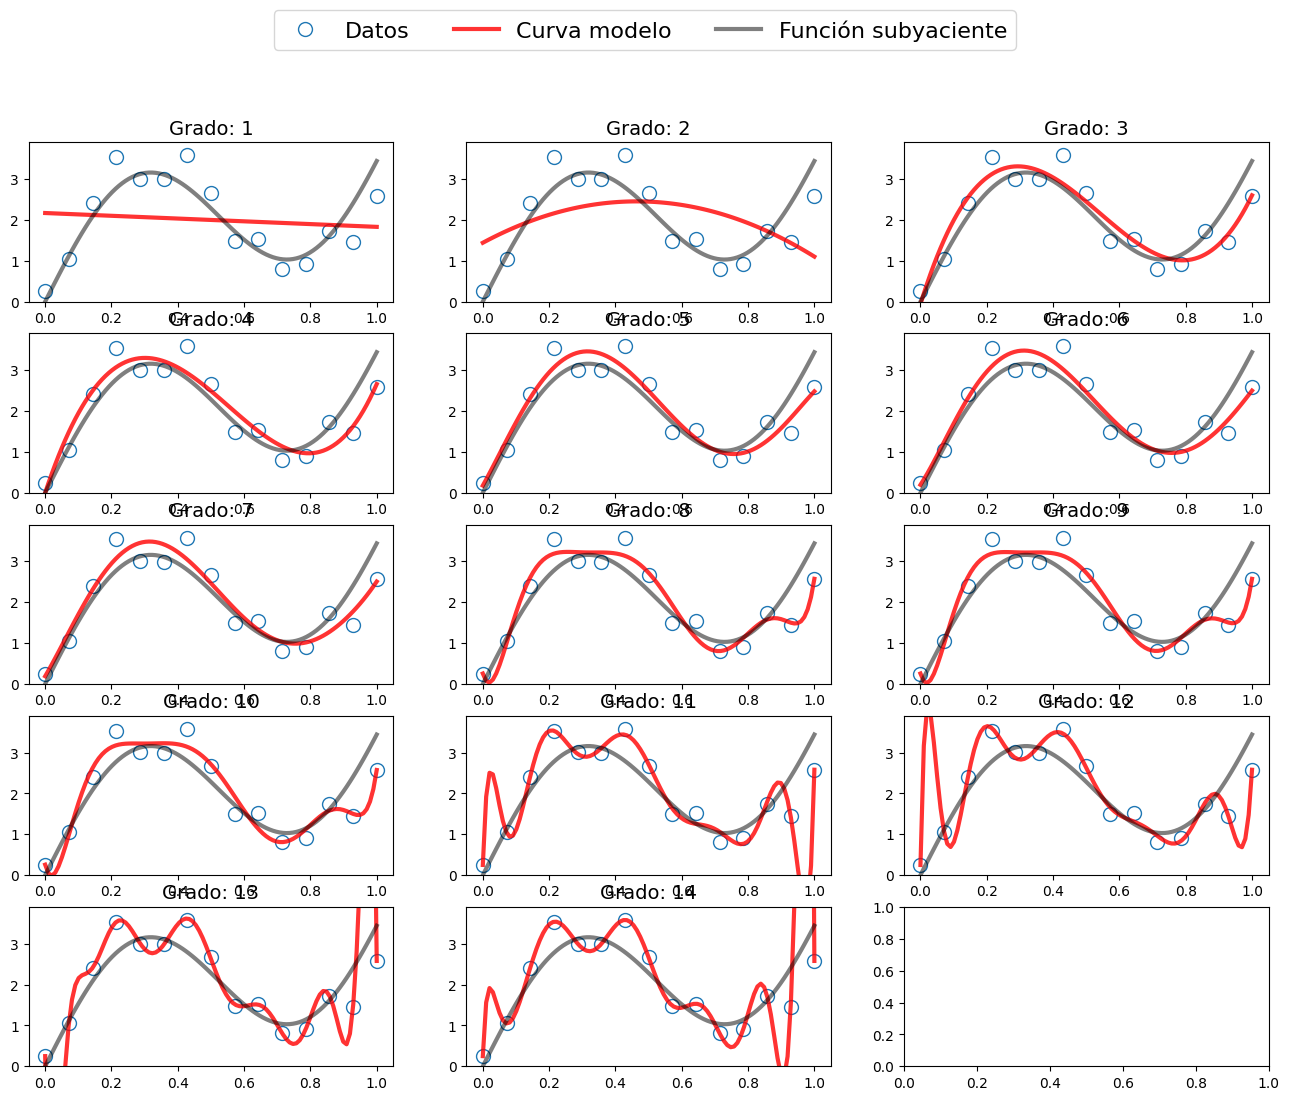

In [17]:
# Hace múltiples gráficas
ncolumns = 3

fig = plt.figure(figsize=(16, 12))

if M % ncolumns == 0: #len(models)
    extrarow = 0
else:
    extrarow = 1
        
axs = fig.subplots(ncols=ncolumns, nrows=int(np.floor(len(models)/ncolumns) + extrarow))

x_ = np.linspace(0,1, 100).reshape(-1,1)
for i, ax in zip(range(len(models)), axs.flatten()):
    ax.plot(x, t, 'o', ms=10, mfc='None', label='Datos')
    ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva modelo')
    ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función subyaciente')
    #
    ax.set_title('Grado: {}'.format(models[i]['poly_features'].degree), fontsize=14)
    #
    ax.set_ylim(0, 3.9)
    
# Make a single legend
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='upper center', ncol=len(handles), 
               fontsize=16, borderaxespad=0.5)

¿Conviene aumentar el grado del polinómio? ¿Que pasaría si tuviéramos menos puntos? ¿Estamos realmente aprendiendo algo sobre la función subyaciente?

# Separando los datos en **entrenamiento** y **testeo**

Para atacar el problema del sobreajuste, separaremos los datos aleatoriamente en un _conjunto de entrenamiento_ y en un _conjunto de testeo_.

Para eso usareremos la función `train_test_split`de `sklearn`.






In [20]:
from sklearn.model_selection import train_test_split

# Split in train and test
x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=42)

Visualizamos el dataset con `matplotlib`. Usamos colores diferentes para los datos del conjunto de testeo y los de entrenamiento. Además, agregamos la función de la que provienen los datos.

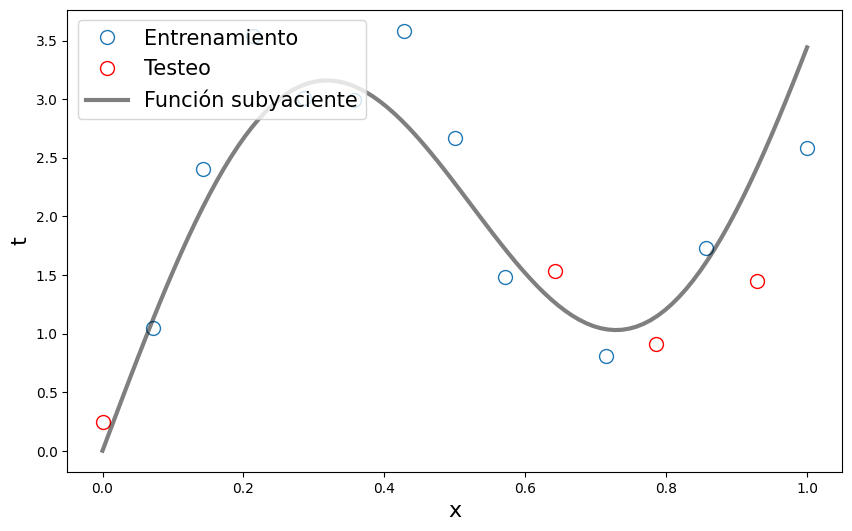

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_ = np.linspace(0,1, 100).reshape(-1,1)
ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_test, t_test, 'or', ms=10, mfc='None', label='Testeo')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función subyaciente')
ax.legend(loc=2, fontsize=15)
    
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

Definamos un par de funciones útiles que vamos a usar durante el resto del notebook.

La primera se usa para graficar los datos y las predicciones de modelos. La segunda calcula los errores de un modelo sobre los datos de entrenamiento y de testeo.

In [24]:
from sklearn.metrics import mean_squared_error

def plot_data(model, x, y, x_test=[], y_test=[], gt=False):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    
    # Plotea los datos
    ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Train')

    # Chequea si el conjunto de prueba está presente
    if len(x_test) > 0:
        assert len(x_test) == len(y_test), "Test dataset size incompatible"
        ax.plot(x_test, t_test, 'or', ms=10, mfc='None', label='Test')

    # Define arreglo sobremuestreado (para que se vea la línea contínua)
    x_ = np.linspace(0,1, 100).reshape(-1,1)

    # Hace las predicciones sobre un arreglo sobre muestreado
    predictions = model.predict(x_)
    
    # Plot curva predicha
    ax.plot(x_, predictions, '-r', label='Curva predicha', lw=4, alpha=0.8)

    # Plot curva verdadera
    if gt:
        ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Ground truth')

    ax.legend(loc=2, fontsize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return
        
def compute_errors(model, x_train, y_train, x_test=None, y_test=None, print_result=True):
    """Compute and print MSE for training and, if given, test datasets."""
    training_error = mean_squared_error(y_train, model.predict(x_train))
    if print_result: print(f"El MSE en el entrenamiento es: {round(training_error,2)}")
    
    if x_test is not None and y_test is not None:
        test_error = mean_squared_error(y_test, model.predict(x_test))
        if print_result: print(f"El MSE en el testeo es: {round(test_error,2)}")
        return training_error, test_error
    else:
        return training_error

## Dependencia en _M_

Vamos a usar todo lo que está arriba para explorar la dependencia de las metricas con el grado _M_ del polinomio.

In [25]:
# Crea una lista de grados (de los polinomios)
degrees = range(1, 10)

# inicializa listas
train_errors = []
test_errors = []
models = []

# itera sobre todos los grados
for M in degrees:
    print(f"Grado del polinomio: {M}")

    # Crea el modelo polinomial
    pr = polynomial_regressor(M)

    # Hace el fit
    pr.fit(x_train, t_train)

    # Evalua los errores
    train_e, test_e = compute_errors(pr, x_train, t_train, x_test, t_test, print_result=True)

#     plot_data(pr,x_train,y_train, x_test, y_test)

    # Graba los resultados en listas
    train_errors.append(train_e)
    test_errors.append(test_e)
    models.append(pr)

Grado del polinomio: 1
El MSE en el entrenamiento es: 0.79
El MSE en el testeo es: 2.05
Grado del polinomio: 2
El MSE en el entrenamiento es: 0.76
El MSE en el testeo es: 1.6
Grado del polinomio: 3
El MSE en el entrenamiento es: 0.14
El MSE en el testeo es: 0.23
Grado del polinomio: 4
El MSE en el entrenamiento es: 0.13
El MSE en el testeo es: 0.75
Grado del polinomio: 5
El MSE en el entrenamiento es: 0.11
El MSE en el testeo es: 0.2
Grado del polinomio: 6
El MSE en el entrenamiento es: 0.07
El MSE en el testeo es: 3.54
Grado del polinomio: 7
El MSE en el entrenamiento es: 0.07
El MSE en el testeo es: 7.59
Grado del polinomio: 8
El MSE en el entrenamiento es: 0.01
El MSE en el testeo es: 99.28
Grado del polinomio: 9
El MSE en el entrenamiento es: 0.0
El MSE en el testeo es: 566.14


Repetimos las **preguntas** de la clase pasada:
1. ¿Cual es el comportamiento del *error de entrenamiento* con $M$?
2. ¿Cual es el comportamiento del *error en en conjunto de prueba* con $M$? Es distinto del error en el conjunto de entrenamiento? Cómo entienden eso?
3. ¿Pueden pensar una forma de elegir _"el mejor"_ valor para $M$?
4. ¿Permitiría ese método estimar el error del modelo en datos a los cuales todavía no se ha tenido acceso?

Veamos como queda gráficamente

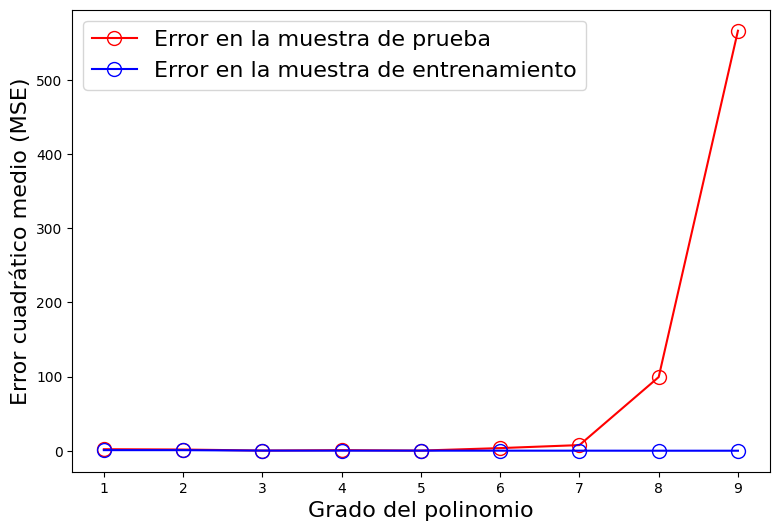

In [27]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.plot(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Es útil hacer gráficas de esos valores en una escala lograrítmica, porque pueden variar mucho.

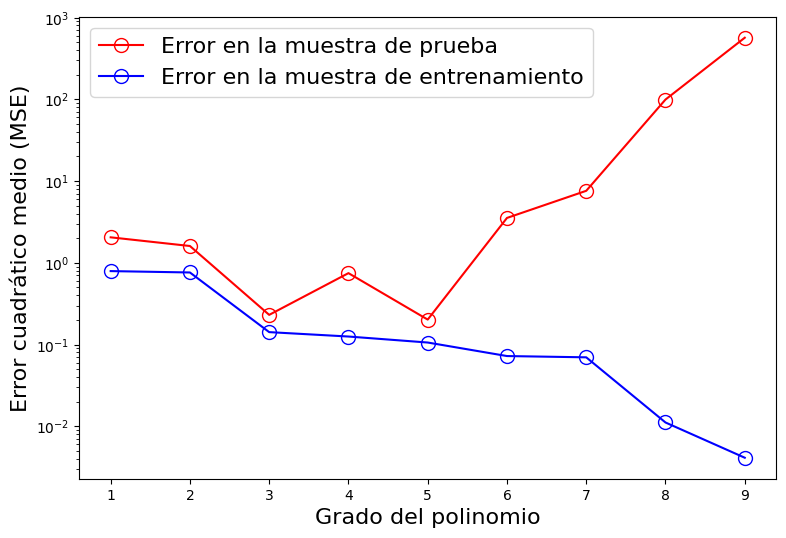

In [28]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.semilogy(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de prueba')
ax.semilogy(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

## Gráficas de los modelos

También es muy ilustrativo ver esos modelos. Sin embargo, hay que tener en cuanta que esto no se puede reproducir facilmente cuando hay más de dos dimensiones.

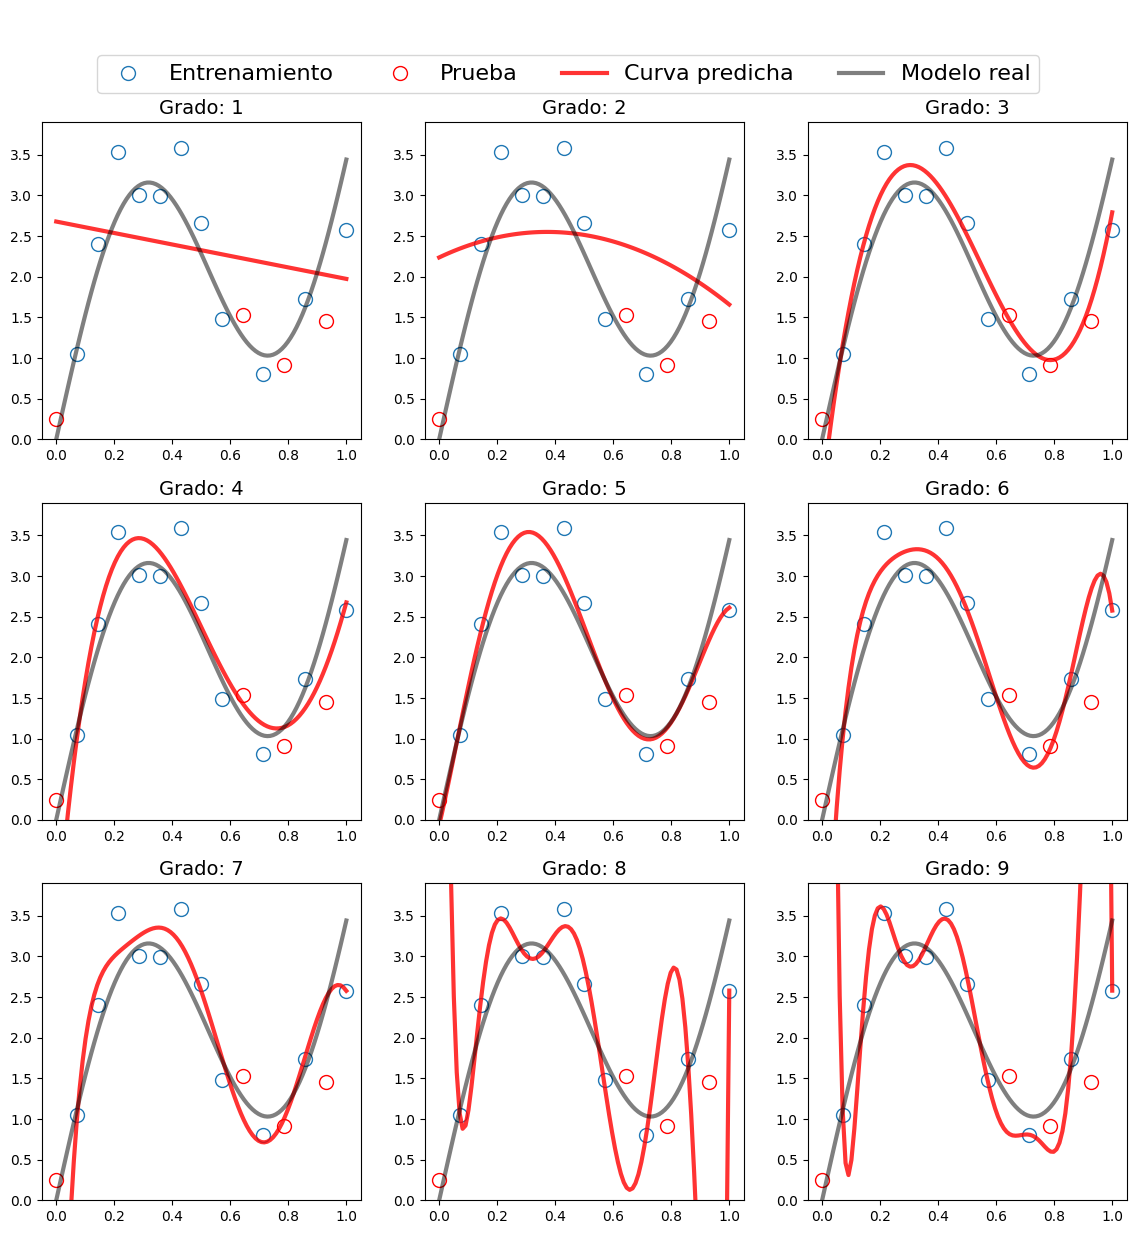

In [29]:
# Hace multiples gráficas para los vários valores del orden del polinomio
ncolumns = 3

fig = plt.figure(figsize=(14, 14))

if len(models) % ncolumns == 0:
    extrarow = 0
else:
    extrarow = 1

axs = fig.subplots(ncols=ncolumns, nrows=int(np.floor(len(models)/ncolumns) + extrarow))

x_ = np.linspace(0,1, 100).reshape(-1,1)
for i, ax in zip(range(len(models)), axs.flatten()):
    ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
    ax.plot(x_test, t_test, 'or', ms=10, mfc='None', label='Prueba')
    ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
    ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Modelo real')
    #
    ax.set_title('Grado: {}'.format(models[i]['poly_features'].degree), fontsize=14)
    #
    ax.set_ylim(0, 3.9)

# Misma leyenda para todos
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='upper center', ncol=len(handles),
               fontsize=16, borderaxespad=2.5)

## Conclusión y pregunta

Vimos que el polinomio de menor error de prueba (o sea, menor error cuando el modelo ajustado con el conjunto de entrenamiento se usa para realizar predicciones sobre el conjunto de prueba) era el de grado cuatro. Mirando a las curvas, parece ser el que mejor se aproxima del processo verdadero.

Ahora, en este caso *sabemos* que el proceso real no puede ser completamente representado por un polinomio con grado finito. Habrá una forma de dar más flexibilidad al algoritmo y todavía evitar el sobreajuste (_overfitting_)? Para llevar eso a cabo necesitamos agregar información al modelo (teorema "no hay almuerzo grátis").

**De eso se trata la regularización:** agragar uno o más hiperparámetro(s) que eviten el sobreajuste, manteniendo los grados de libertad del modelo.

# Regularización

## Motivación empírica

El sobreajuste (_overfitting_) es una consecuencia de intentar minimizar la función error usando modelos muy flexible. Parece claro que un camino para mejorar sería modificando de alguna forma la función error.

Escribamos:

$$
MSE(\boldsymbol{\omega}) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2\;\;.
$$

**¿Como deberíamos modificar esa expresión?**
Algunos indicios pueden ser obtenidos al mirar los valores de los parámetros de la regresión polinomial.

In [30]:
import pandas as pd
coef = np.full((len(models)+1, len(models)), np.nan)
for i in range(len(models)):
    coef[:i+2, i] = models[i]['regressor'].coef_[0]

coef_df = pd.DataFrame(coef, columns=range(1, len(models)+1))
coef_df

,1,2,3,4,5,6,7,8,9
0,2.678990,2.237507,-0.671463,-1.408085,-0.067530,-3.216773,-5.140518,19.318659,4.743040e+01
1,-0.705441,1.686451,30.565330,41.278919,15.250591,90.214471,144.132045,-639.879185,-1.641698e+03
2,NaN,-2.265824,-69.723952,-111.975992,40.297096,-544.285949,-1074.703968,8274.395980,2.216014e+04
3,NaN,NaN,42.622354,103.356524,-264.638281,1779.219127,4263.219409,-51609.489858,-1.521918e+05
4,NaN,NaN,NaN,-28.577151,358.638845,-3169.942676,-9348.868682,177942.291223,6.047074e+05
5,NaN,NaN,NaN,NaN,-146.871277,2788.057870,11146.902111,-355783.891342,-1.469892e+06
6,NaN,NaN,NaN,NaN,NaN,-937.472639,-6731.973493,409119.135256,2.216601e+06
7,NaN,NaN,NaN,NaN,NaN,NaN,1609.009298,-250320.720683,-2.021656e+06
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63001.418825,1.020749e+06
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.188813e+05


***
**Preguntas**

* ¿Qué vemos aquí? ¿Cómo cambia la magnitud de los coeficientes a medida que aumentamos el grado del polinomio?

Podemos ver los 10 términos del polinomio de grado 9 con distintos colores:

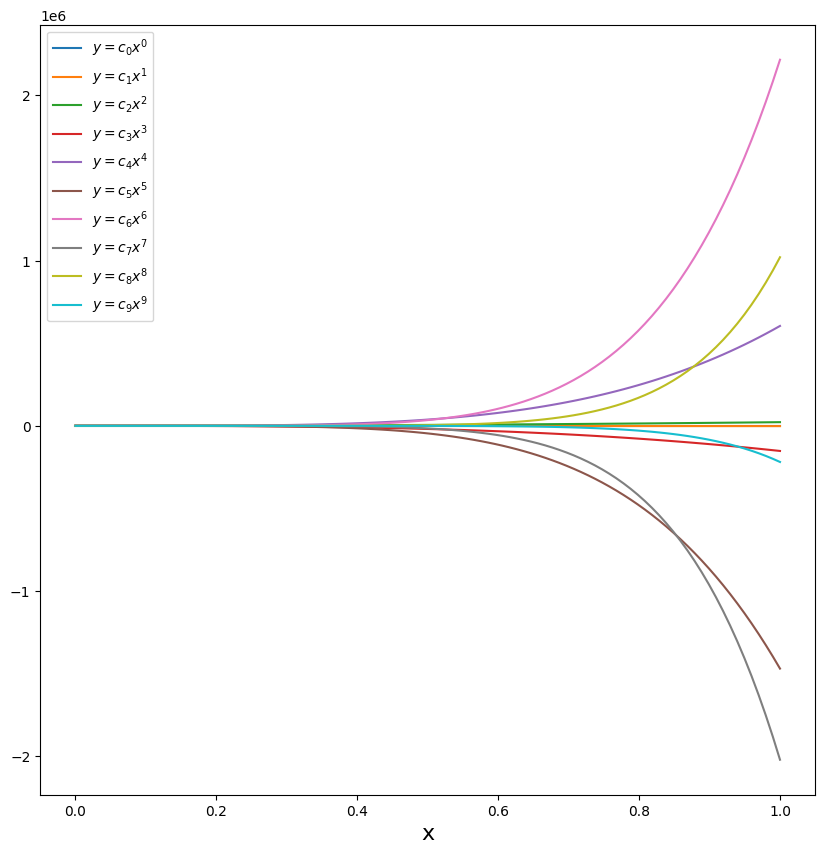

In [31]:
# Perform multi-plot

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
xplot = np.linspace(0, 1, 100, endpoint = True)
for i  in range(10):
    plt.plot(xplot, models[8]['regressor'].coef_[0][i]*xplot**i, label='$y = c_{i}x^{i}$'.format(i=i))
plt.legend(loc='best')

plt.xlabel('x', fontsize=16)


plt.show()


## Regresión contraída (_Ridge regression_)

### Función de error modificada

El hecho de que los coeficientes aumentan abruptamente cuando empezamos a sobreajustar nos da una idea de incluir una penalización para valores grandes de los parámetros. Una forma de implementar eso es agregar un nuevo término a la función error:

$$
E_\text{ridge}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M \omega_i^2\;\;.
$$
El nuevo término es llamado de término de regularización (o penalización). La parte que multiplica $\lambda/2$ es el cuadrado de la normal del vector de parámetros,

$$
||\boldsymbol{\omega}||^2 = \boldsymbol{\omega}^T \boldsymbol{\omega} = \left(\omega_1 \ldots \omega_M\right)\begin{pmatrix}\omega_1 \\ \vdots \\ \omega_M\end{pmatrix} = \sum_{i=1}^M \omega_i^2\;\;.
$$

El parámetro de regularización $\lambda$ constituye un *nuevo hiperparámetro del modelo.*

Con ese nuevo término, vemos que valores muy grandes de los parámetros serán penalizados (acuérdense que tenemos que minimizar _E_). Una de las grandes ventajas matemáticas de esa regresión, que se conoce por **regresión contraída** (o *Ridge regression*), es que todavía se puede encontrar una solución analítica para encontrar los parámetros que minimizan el error modificado.

Eso es una consecuencia directa del uso de la norma $L2$, que no es nada más que la suma de los cuadrados de los parámetros de los parámetros del modelo.

Veamos cómo funciona en la práctica.

**Vamos a ajustar nuevamente un polinomio de grado 9 a los mismos datos, pero ahora usando un regresor regularizado**.

* exploren la documentación de `Ridge` llamando `Ridge?` o `help(Ridge)`. Vean que la API para ese estimador es __exactamente la misma__ que para la regresión lineal `LinearRegression`


In [32]:
from sklearn.linear_model import Ridge

* creamos la función `ridge` que genera un objeto `Pipeline` análogo al regresor polinómico  (`polynomial_regressor`) anterior, pero implementando la regresión de ridge.

In [33]:
def ridge(m, lam):
    """
    Construye un pipeline para la regresión contraída

    :param int m: grado del polinomio de las características
    :param float ll: coeficiente de regularización lambda

    atención: la función ridge toma como argumento alpha = lambda/2
    """
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=lam/2.0,fit_intercept=False))])

* instancia el pipeline para ejecutar una regesión con polinomio de grado 9 con lambda = 0.001 y la usa para a ajustar los datos del ejemplo.

In [34]:
ridge_pipe = ridge(9,0.001)
ridge_pipe.fit(x_train,t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('regressor', Ridge(alpha=0.0005, fit_intercept=False))])

* Hace la gráfica de los resultados: datos, predicción del modelo, modelo subyacente
(_ground truth_)

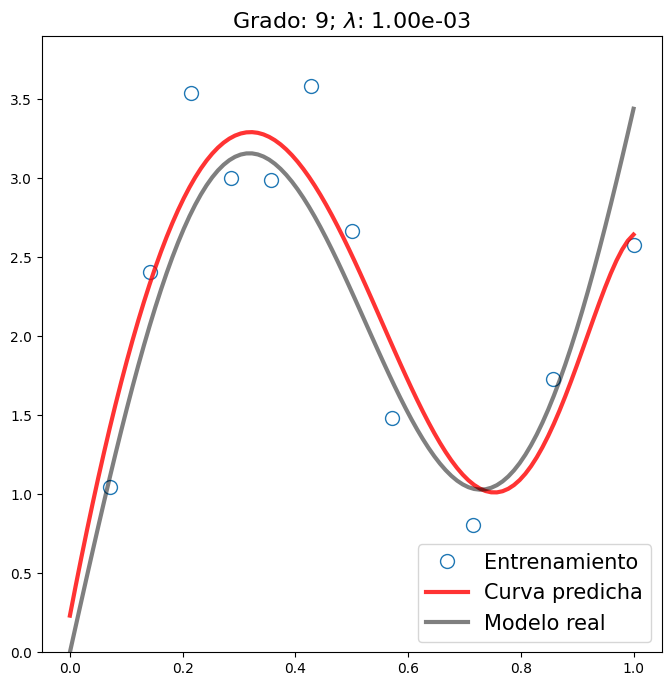

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_, ridge_pipe.predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Modelo real')
    #
ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(ridge_pipe['poly_features'].degree,
                                                    ridge_pipe['regressor'].alpha *2), fontsize=16)
    #
ax.set_ylim(0, 3.9)
ax.legend(loc=0, fontsize=15)

**Pregunta**: compare el modelo ajustado con el modelo correspondiente sin regularización (ver las gráficas de arriba).

Gracias al término de regularización, la curva es mucho menos oscilatoria y nos da una impresión de una generalización mejor.
Esto puede ser cuantificado usando el error cuadrático medio (MSE) en el conjunto de prueba.

In [36]:
print('OLS; grado 9')
print('El MSE del entrenamiento es: {:.2f}'.format(train_errors[-1]))
print('El MSE del conjunto de prueba es: {:.2f}'.format(test_errors[-1]))
print('####')
print('Regresión contraída; grado {}, lambda = {}'.format(ridge_pipe['poly_features'].degree,
                                                        ridge_pipe['regressor'].alpha *2))
train_e, test_e = compute_errors(ridge_pipe, x_train, t_train, x_test, t_test, print_result=True)

OLS; grado 9
El MSE del entrenamiento es: 0.00
El MSE del conjunto de prueba es: 566.14
####
Regresión contraída; grado 9, lambda = 0.001
El MSE en el entrenamiento es: 0.12
El MSE en el testeo es: 0.12


**Pregunta**. ¿Eso significa que estamos efectivamente usando un polinonio con menor grado?

Trate de responder a esa pregunta mostrando en la pantalla los coeficientes de este ajuste.


In [37]:
ridge_pipe['regressor'].coef_[0]

array([  0.23204218,  18.63914663, -25.18517056, -13.00389175,
         4.06644509,  12.87128758,  13.17678319,   7.38919283,
        -2.09463452, -13.4466989 ])

### Contracción (_Shrinkage_)

Estas técnicas a veces son referidas como de **contracctión** (_Shrinkage_), porque hacen que los parámetros del modelo disminuyan en la medida que el parámetro de regularización aumenta.
En términos más técnicos, eso hace que el modelo intercambie algo de varianza por algo de sesgo.

**Ejectue código abajo** para ver como queda la evolución de los valores de los parámetros de un modelo polinómico de grado 9 cuando vamos de valores bajos a valores altos del término de penalización.

In [38]:
# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-5, 0, 100)

cc = []

# Itera sobre los valores, ajusta y graba los valores de los coeficientes
for ll in lls:
    # Create model
    ridge_pipe = ridge(9, ll)
    ridge_pipe.fit(x_train,t_train)

    # Recupera los valores de los coeficientes y agrega a la lista cc
    cc.append(ridge_pipe['regressor'].coef_[0])

cc = np.array(cc)

Exploren los valores de los parámetros. Pueden imprimirlos o hacer gráficos con la ayuda del código abajo.

Text(0, 0.5, 'Valor del parámetro')

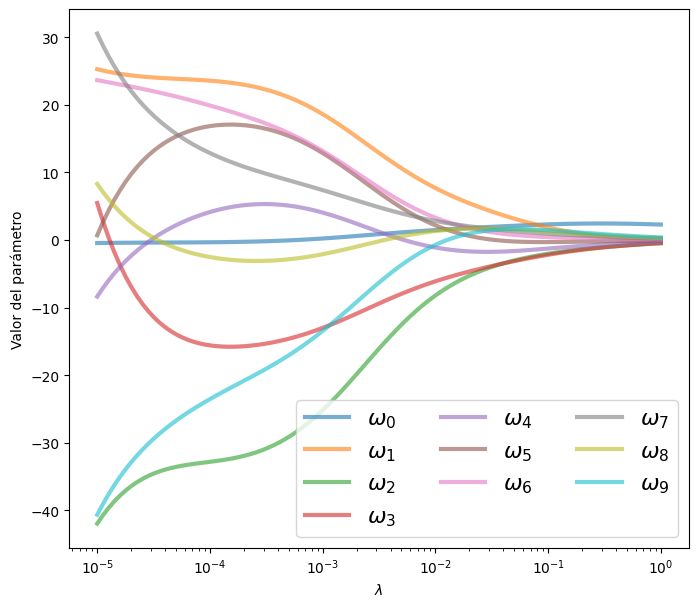

In [39]:
# Valores de los coeficintes versus el parámetro de renormalización.
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

for i in range(len(cc[0])):
    ax.semilogx(lls, cc[:, i], label='$\omega_{{{}}}$'.format(i), lw=3, alpha=0.6)
ax.legend(ncol=3, fontsize=16)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('Valor del parámetro')

***

## Lasso

Otra regresión regularizada que se utiliza a menudo es la regresión **LASSO (_least absolute shrinkage and selection operator_ / operador de reducción y selección mínima absoluta)**, que selecciona de forma natural las variables más relevantes y produce modelos más parsimoniosos.

En lugar de penalizar la función de error utilizando la suma de los cuadrados de los parámetros del modelo, como en el caso anterior, **LASSO** explota la norma $l1$, que es simplemente la suma de los *valores absolutos* de los parámetros del modelo.

En otras palabras, la norma $l1$ de un vector es, simplemente:

$$
||\boldsymbol{\omega}||_1 = \sum_i |\omega_i|\;\;.
$$

La función de error modificada es, por lo tanto,
$$
E_\text{lasso}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M |\omega_i|\;\;,
$$
donde nuevamente introducimos el hiperparámetro $\lambda$ para controlar el nivel de penalización.

###Adiós soluciones analíticas

La primera consecuencia de esta elección de la penalización es que la función de error ya no puede optimizarse (minimizarse) analíticamente. Es necesario recurrir, entonces, a diferentes algoritmos iterativos.

En `sklearn`, hay dos implementaciones:

* `linear_model.Lasso` usa *descenso por coordenadas* para encontrar el mínimo de la función de error.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coordinate_descent.svg/500px-Coordinate_descent.svg.png" width=500px></img>

* `linear_model.LassoLars` utiliza LARS (regresión de ángulo mínimo / _least angle regression_), estrechamente relacionado con _forward stepwise regression_ (es decir, todos los coeficientes comienzan en cero, $\boldsymbol{\omega} = 0$, y se incrementan progresivamente). Pueden leer más en la [documentación de scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)


### Implementación

Importen `Lasso` y `LassoLars` y exploren su documentación y argumentos. ¿Cuáles son los parámetros que están asociados al procedimiento de optimización?

In [135]:
from sklearn.linear_model import Lasso, LassoLars

Creen una función `lasso` tal y como hicimos para la regresión de _ridge_. Elijan una implementación de LASSO. Pueden ver los parámetros de Lasso utilizando `Lasso?`.

In [136]:
Lasso?

In [137]:
def lasso(m, ll):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Lasso(alpha=ll/2.0, fit_intercept=False, max_iter=500000))])

Utilicen esto para ajustar los datos con *features* polinomiales de grado nueve. Utilicen el mismo parámetro de regularización que el anterior: 0.001.

In [138]:
lasso_pipe = lasso(9, 0.01)
lasso_pipe.fit(x_train, t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('regressor',
                 Lasso(alpha=0.005, fit_intercept=False, max_iter=500000))])

Grafiquen los resultados con la ayuda del código de abajo.

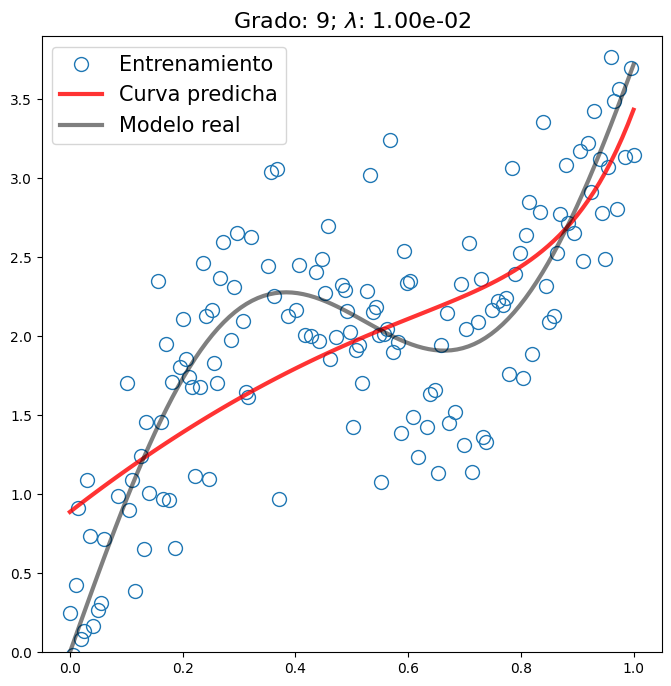

In [139]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_, lasso_pipe.predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Modelo real')
    #
ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(lasso_pipe['poly_features'].degree,
                                                    lasso_pipe['regressor'].alpha *2), fontsize=16)
    #
ax.set_ylim(0, 3.9)
ax.legend(loc=0, fontsize=15)

A primera vista, parece que ambos regresores producen los mismos resultados. Pero en realidad hay una _gran diferencia_ entre ambos métodos.

**Compare los coeficientes encontrados con cada método**. Puede acceder a ellos

In [140]:
ridge_pipe['regressor'].coef_

array([[ 0.91447543,  2.67671665, -0.56140333, -0.93114955, -0.51607186,
        -0.04596023,  0.30082571,  0.51105439,  0.61239215,  0.63645531]])

In [141]:
lasso_pipe['regressor'].coef_

array([ 0.88859119,  2.76802891, -1.2477057 , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.02586564])

**Pregunta**. ¿Ven alguna diferencia?

### Shrinkage recargado

Volvamos a hacer la gráfica de *shrinkage*

In [142]:
# crea los valores de lambda
lls = np.logspace(-4, 1, 100)

cc_lasso = []

# Itera sobre los valors de lambda, ajusta y guarda los valores de los coeficientes
for ll in lls:
    #print(ll)
    lasso_pipe = lasso(degrees[-1], ll)
    lasso_pipe.fit(x_train, t_train)
    cc_lasso.append(lasso_pipe['regressor'].coef_)

cc_lasso = np.array(cc_lasso)

Grafiquen las amplitudes de los coeficientes en función del parámetro de regularización para el caso de Lasso.

Text(0, 0.5, 'Valor del parámetro')

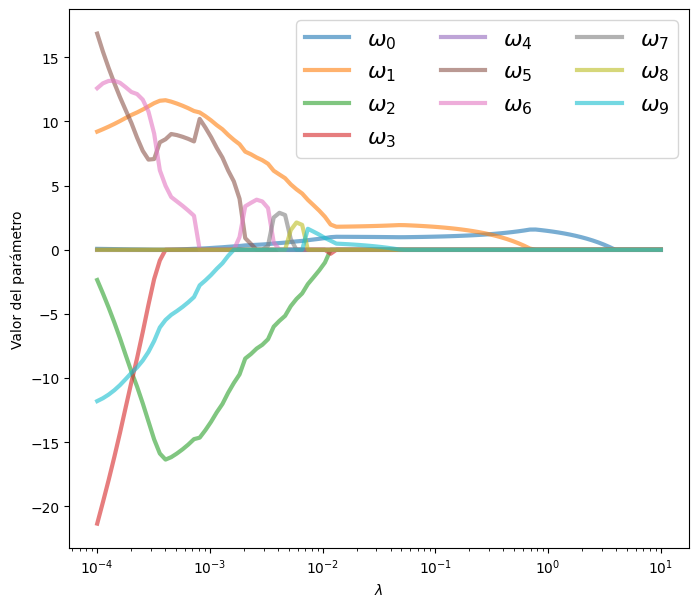

In [143]:
# Valores de los coeficintes versus el parámetro de renormalización.
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

for i in range(len(cc_lasso[0])):
    ax.semilogx(lls, cc_lasso[:, i], label='$\omega_{{{}}}$'.format(i), lw=3, alpha=0.6)
ax.legend(ncol=3, fontsize=16)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('Valor del parámetro')

Como pueden ver, a medida que aumentamos el término de regularización, algunos parámetros se van estrictamente a cero. De este modo, la regresión Lasso también funciona como una especie de herramienta de selección automática de modelos.

## Interpretación geométrica

Para entender el diferente comportamiento entre Ridge y Lasso, utilicemos un bonito gráfico del [libro de Bishop](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/).

<table>
    <tr>
        <td>
      <img src="https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/ridge.png" width=250px>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/lasso.png" width=250px>
        </td>
    </tr>
    </table>

El punto azul en el centro de los círculos representa la solución no regularizada, es decir, la solución OLS, y $\omega^*$ es el vector de parámetros óptimos bajo penalización.

## A cero ida y vuelta

El comportamiento de algunos de los coeficientes en el gráfico anterior parece contradictorio. Después de llegar a cero, algunos coeficientes parecen recuperar valores no negativos. Construyamos un gráfico en el que esto se vea más fácilmente.

<ipython-input-144-56381f88b86f>:9: RuntimeWarning: divide by zero encountered in log
  Zp = np.where(np.abs(cc_lasso)>0, np.log(np.abs(cc_lasso)), -np.inf)


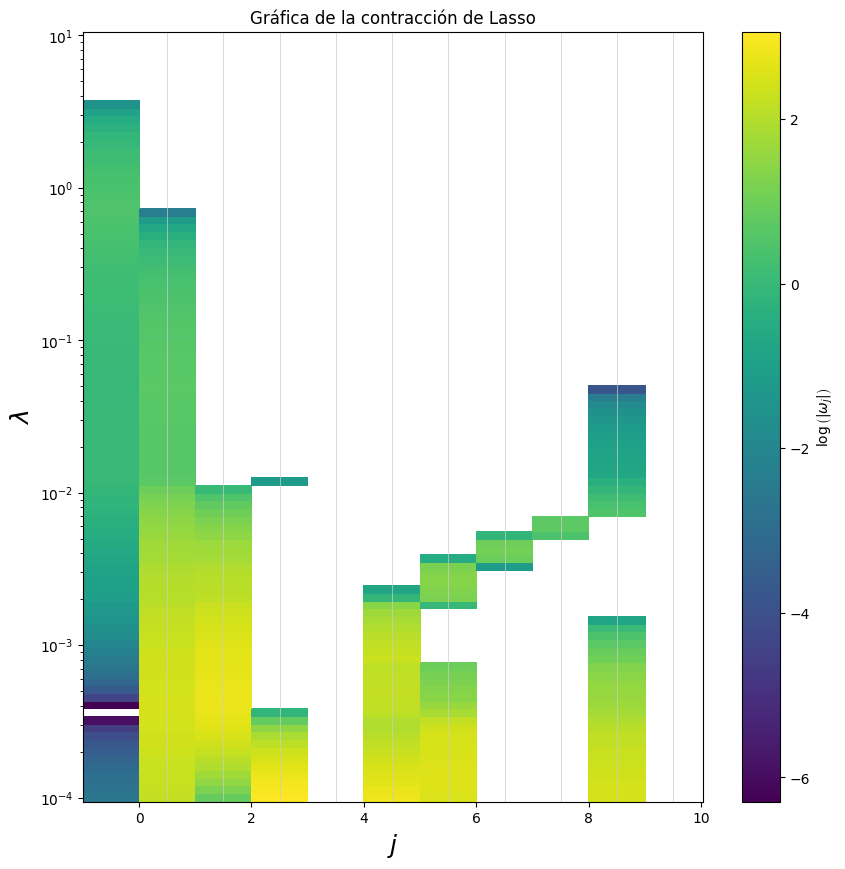

In [144]:
# Hace una gráfica de todos los coeficientes

# Instancia figura y ejes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Crea el método "meshgrid" basado en los valores de lambda
Xp, Yp = np.meshgrid(np.arange(10)-0.5, lls)
Zp = np.where(np.abs(cc_lasso)>0, np.log(np.abs(cc_lasso)), -np.inf)

# lineas verticales
for i in range(10):
    ax.axvline(i+0.5, color='0.8', lw=0.5)

# gráfica de colores
pcol = ax.pcolor(Xp, Yp, Zp)

# escala logarítmica
ax.set_yscale('log')

# barra de color y nombre de los ejes
plt.colorbar(pcol, label='$\log\left(|\omega_j|\\right)$')
ax.set_xlabel('$j$', fontsize=18)
ax.set_ylabel('$\lambda$', fontsize=18)

text = ax.set_title('Gráfica de la contracción de Lasso')

**Pregunta**. ¿Cómo interpretan el comportamiento de los parámetros a partir de los esquemas geométricos anteriores?